# MNIST Handwritten Digits Recognition & Classification

> This notebook gives a first hand Convolutional Neural Network approach using tensorflow and keras for the task of Handwritten digits recognition and classification<br><br>
> This dataset is pretty much the 'Hello World!' of Computer Vision<br>
> Hope this helps beginners interested in Image recognition and classification to have a jump start!

## Notes:
* Kaggle Competition Link for dataset: https://www.kaggle.com/c/digit-recognizer
* About the dataset: The dataset consists of 10 classes of handwritten numbers between 0-9 as Images.
* Jump in! 😃

## Import Libraries

In [1]:
## Importing all necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from tensorflow.keras import backend as K

In [ ]:
# Reading the folder architecture of Kaggle to get the dataset path.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [2]:
# Reading the Datasets.
mnist_train = pd.read_csv("/content/train.csv.zip")
mnist_test = pd.read_csv("/content/test.csv.zip")

In [3]:
# Printing the dimensions/shape of the given data
print(mnist_train.shape, mnist_test.shape)

(42000, 785) (28000, 784)


We see that there are 42000 train and 28000 test examples

In [4]:
# Preliminary analysis
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mnist_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Data Normalization and Cleaning

In [6]:
mnist_train.isna().any().any()

np.False_

#### NOTE:
* Data is totally clean in this case (since the final result says `False` which means it has no missing values)
* There is no empty field. Data is clean already.

### Data Normalization

In [7]:
# dividing the data into the input and output features to train make the model learn based on what to take in and what to throw out.
mnist_train_data = mnist_train.loc[:, "pixel0":]
mnist_train_label = mnist_train.loc[:, "label"]

# Normalizing the images array to be in the range of 0-1 by dividing them by the max possible value.
# Here is it 255 as we have 255 value range for pixels of an image.
mnist_train_data = mnist_train_data/255.0
mnist_test = mnist_test/255.0

### Visulaize a single digit with an array

IMAGE LABEL: 4


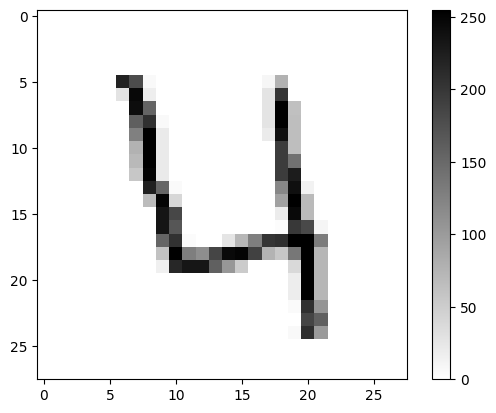

In [8]:
# Let's make some beautiful plots.
digit_array = mnist_train.loc[3, "pixel0":]
arr = np.array(digit_array)

#.reshape(a, (28,28))
image_array = np.reshape(arr, (28,28))

digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)
print("IMAGE LABEL: {}".format(mnist_train.loc[3, "label"]))

IMAGE LABEL: 0


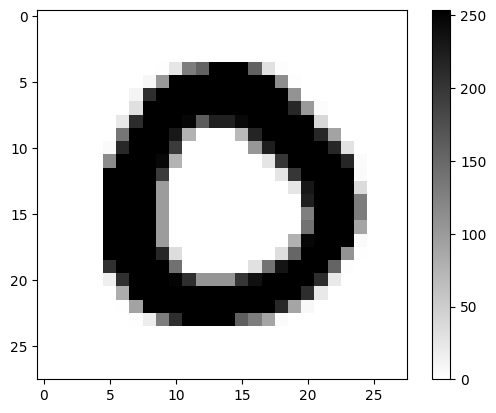

In [9]:
# Let's make some beautiful plots.
digit_array = mnist_train.loc[4, "pixel0":]
arr = np.array(digit_array)

#.reshape(a, (28,28))
image_array = np.reshape(arr, (28,28))

digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)
print("IMAGE LABEL: {}".format(mnist_train.loc[4, "label"]))

### Countplot for each of the 10 digits.

[4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188]


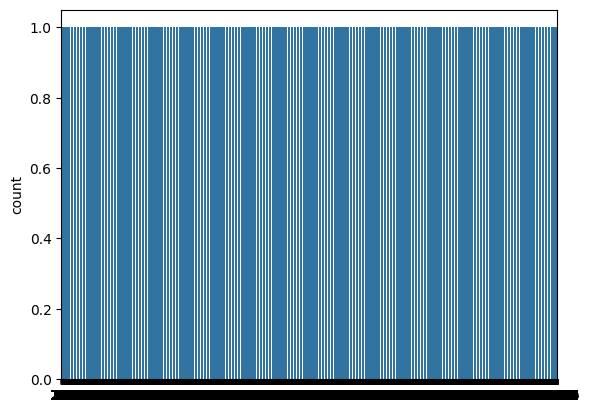

In [10]:
# Let's build a count plot to see the count of all the labels.
sns.countplot(mnist_train.label)
print(list(mnist_train.label.value_counts().sort_index()))

The distribution of data across the classes of digits is pretty much the same

In [11]:
# Converting dataframe into arrays
mnist_train_data = np.array(mnist_train_data)
mnist_train_label = np.array(mnist_train_label)

In [12]:
# Reshaping the input shapes to get it in the shape which the model expects to recieve later.
mnist_train_data = mnist_train_data.reshape(mnist_train_data.shape[0], 28, 28, 1)
print(mnist_train_data.shape, mnist_train_label.shape)

(42000, 28, 28, 1) (42000,)


### Model Building Process
> Training a neural network with one input layer, one hidden layer and one output layer for learning the digits in images.

In [14]:
# But first import some cool libraries before getting our hands dirty!!
# TensorFlow is Google's open source AI framework and we are using is here to build model.
# Keras is built on top of Tensorflow and gives us
# NO MORE GEEKY STUFF, Know more about them here:  https://www.tensorflow.org     https://keras.io

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
### When the accuracy or loss starts to plateau during training we can implement the following callbacks
#### to lower the learning rate and hence make smaller steps as it gets closer to the global optimum
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler

### Encoding train labels

In [15]:
# Encoding the labels and making them as the class value and finally converting them as categorical values.
nclasses = mnist_train_label.max() - mnist_train_label.min() + 1
mnist_train_label = to_categorical(mnist_train_label, num_classes = nclasses)
print("Shape of y_train after encoding: ", mnist_train_label.shape)

Shape of y_train after encoding:  (42000, 10)


### Building a Sequential Model

In [16]:
# This function builds the CNN Necessary for recognition, detailed explanation in the comments

def build_model(input_shape=(28, 28, 1)):
    model = Sequential()     ## We need a sequential model obviously (don't require bidirectional, etc)
    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = input_shape)) # First 2D Convolutional layer
    model.add(BatchNormalization()) # Activation is Rectified Linear Unit of ReLU for all layers
    model.add(Conv2D(32, kernel_size = 3, activation='relu')) # Batch Normalization is used along with Dropout
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    ## Dropout Regularization of 0.4 in order to avoid overfitting
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size = 4, activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax')) ## Softmax activation used as this is a multiclass classification task
    return model    ## The number of units is 10 as there are 10 different classes of digits

### Utility Functions

In [17]:
def compile_model(model, optimizer='adam', loss='categorical_crossentropy'):
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"]) # using adam optimization, RMSProp works fine too
    ## Categorical crossentropy is used as the multiclass loss

def train_model(model, train, test, epochs, split):
    history = model.fit(train, test, shuffle=True, epochs=epochs, validation_split=split)
    return history ## Data is shuffled during training to avoid inherent bias to the sequence of occurence of an image

Training for 50 epochs

In [18]:
# Training the model using the above function built to build, compile and train the model
cnn_model = build_model((28, 28, 1)) ## The input is an image odf size 28 X 28
compile_model(cnn_model, 'adam', 'categorical_crossentropy')

# train the model for as many epochs as you want but I found training it above 100 will not help us and eventually
## increase overfitting.
model_history = train_model(cnn_model, mnist_train_data, mnist_train_label, 50, 0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8208 - loss: 0.5920 - val_accuracy: 0.9756 - val_loss: 0.0753
Epoch 2/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9717 - loss: 0.0967 - val_accuracy: 0.9874 - val_loss: 0.0429
Epoch 3/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9787 - loss: 0.0697 - val_accuracy: 0.9895 - val_loss: 0.0350
Epoch 4/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9833 - loss: 0.0581 - val_accuracy: 0.9904 - val_loss: 0.0347
Epoch 5/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9843 - loss: 0.0507 - val_accuracy: 0.9893 - val_loss: 0.0381
Epoch 6/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9870 - loss: 0.0429 - val_accuracy: 0.9921 - val_loss: 0.0303
Epoch 7/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9873 - loss: 0.0434 - val_accuracy: 0.9906 - val_loss: 0.0341
Epoch 8/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9877 - loss: 0.037

### Model Performance Analysis

In [19]:
def plot_model_performance(metric, validations_metric):
    plt.plot(model_history.history[metric],label = str('Training ' + metric))
    plt.plot(model_history.history[validations_metric],label = str('Validation ' + metric))
    plt.legend()

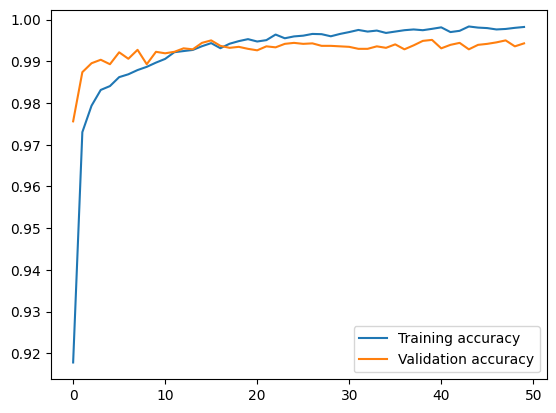

In [20]:
### Plotting the accuracy's
plot_model_performance('accuracy', 'val_accuracy')

The training accuracy steadily increased and plateaued while validation accuracy is also consistent. This clearly shows the model is robust!

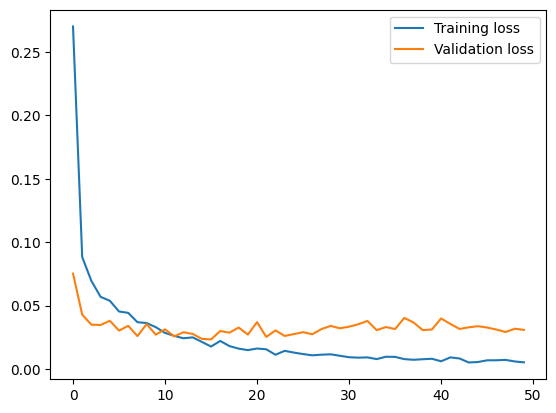

In [21]:
## Plotting the loss
plot_model_performance('loss', 'val_loss')

### Transforming testing data

In [22]:
# reshaping the test arrays as we did to train images above somewhere.
mnist_test_arr = np.array(mnist_test)
mnist_test_arr = mnist_test_arr.reshape(mnist_test_arr.shape[0], 28, 28, 1)
print(mnist_test_arr.shape)

(28000, 28, 28, 1)


### Prediction & Submission

In [23]:
# Now, since the model is trained, it's time to find the results for the unseen test images.
predictions = cnn_model.predict(mnist_test_arr)

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [24]:
# Finally, making the final submissions
predictions_test = []

for i in predictions:
    predictions_test.append(np.argmax(i))

In [25]:
## Submitting in the required format
submission =  pd.DataFrame({
        "ImageId": mnist_test.index+1,
        "Label": predictions_test
    })

submission.to_csv('/content/sample_submission.csvsubmission.csv', index=False)

In [26]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


I hope you liked it.<br>

Edit 1: Making the cells more meaningful and clearer with comments

Edit 2: Adding submission file and few more visualizations.

### Kindly upvote if it was helpful! 😃